In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
from sklearn.decomposition import PCA

In [6]:
df_penguins = pd.read_csv("penguins_lter.csv",index_col="Sample Number")
df_penguins.head()

,studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
Sample Number,,,,,,,,,,,,,,,,
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
3,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
5,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [5]:
df_penguins.dtypes

studyName               object
Sample Number            int64
Species                 object
Region                  object
Island                  object
Stage                   object
Individual ID           object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Comments                object
dtype: object

In [7]:
Total=df_penguins.isnull().sum().sort_values(ascending=False)
percent=(df_penguins.isnull().sum()*100/df_penguins.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([Total,percent],axis=1,keys=["Total","percent"])
missing_data

,Total,percent
Comments,318,92.441860
Delta 15 N (o/oo),14,4.069767
Delta 13 C (o/oo),13,3.779070
Sex,10,2.906977
Culmen Length (mm),2,0.581395
Culmen Depth (mm),2,0.581395
Flipper Length (mm),2,0.581395
Body Mass (g),2,0.581395
studyName,0,0.000000
Species,0,0.000000


In [9]:
df_penguins.drop(["Comments","Individual ID","Date Egg"],axis=1,inplace=True)

In [11]:
df_penguins["Delta 15 N (o/oo)"].fillna(df_penguins["Delta 15 N (o/oo)"].median(),inplace=True)

In [12]:
df_penguins["Delta 13 C (o/oo)"].fillna(df_penguins["Delta 13 C (o/oo)"].mean(),inplace=True)

In [14]:
df_penguins["Sex"].fillna(df_penguins["Sex"].mode(),inplace=True)

In [15]:
df_penguins["Culmen Length (mm)"].fillna(df_penguins["Culmen Length (mm)"].mean(),inplace=True)

In [16]:
df_penguins["Culmen Depth (mm)"].fillna(df_penguins["Culmen Depth (mm)"].mean(),inplace=True)

In [17]:
df_penguins["Flipper Length (mm)"].fillna(df_penguins["Flipper Length (mm)"].mean(),inplace=True)

In [18]:
df_penguins["Body Mass (g)"].fillna(df_penguins["Body Mass (g)"].mean(),inplace=True)

In [20]:
Total=df_penguins.isnull().sum().sort_values(ascending=False)
percent=(df_penguins.isnull().sum()*100/df_penguins.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([Total,percent],axis=1,keys=["Total","percent"])
missing_data

,Total,percent
Sex,10,2.906977
studyName,0,0.000000
Species,0,0.000000
Region,0,0.000000
Island,0,0.000000
Stage,0,0.000000
Clutch Completion,0,0.000000
Culmen Length (mm),0,0.000000
Culmen Depth (mm),0,0.000000
Flipper Length (mm),0,0.000000


In [21]:
df_penguins.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,8.730086,-25.686292
std,5.443643,1.969027,14.020657,799.613058,0.540630,0.778770
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,39.275000,15.600000,190.000000,3550.000000,8.307415,-26.285460
50%,44.250000,17.300000,197.000000,4050.000000,8.652405,-25.793660
75%,48.500000,18.700000,213.000000,4750.000000,9.136170,-25.089467
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [22]:
df_numeric_features = df_penguins.select_dtypes(include=[np.number])
df_num = df_numeric_features
df_num.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Sample Number,,,,,,
1,39.10000,18.70000,181.000000,3750.000000,8.652405,-25.686292
2,39.50000,17.40000,186.000000,3800.000000,8.949560,-24.694540
3,40.30000,18.00000,195.000000,3250.000000,8.368210,-25.333020
4,43.92193,17.15117,200.915205,4201.754386,8.652405,-25.686292
5,36.70000,19.30000,193.000000,3450.000000,8.766510,-25.324260


In [23]:
df_num_std = StandardScaler().fit_transform(df_num)
df_num_std

array([[-8.87081226e-01,  7.87742515e-01, -1.42248782e+00,
        -5.65789211e-01, -1.43895643e-01, -4.56860041e-15],
       [-8.13493989e-01,  1.26556330e-01, -1.06535169e+00,
        -5.03167881e-01,  4.06550879e-01,  1.27533961e+00],
       [-6.66319516e-01,  4.31719184e-01, -4.22506659e-01,
        -1.19200251e+00, -6.70335209e-01,  4.54288370e-01],
       ...,
       [ 1.19175820e+00, -7.38071758e-01,  1.50602843e+00,
         1.93906399e+00, -7.93611668e-01, -4.56354781e-01],
       [ 2.35124131e-01, -1.19581604e+00,  7.91756176e-01,
         1.25022936e+00, -9.03273071e-01, -5.57327315e-01],
       [ 1.09977416e+00, -5.34629855e-01,  8.63183401e-01,
         1.50071468e+00, -6.78319004e-01, -6.03132736e-01]])

In [24]:
df_num_std.shape

(344, 6)

In [25]:
cov_mat = np.cov(df_num_std.T)
cov_mat[0:5]

array([[ 1.00291545, -0.23573816,  0.65809441,  0.59684484, -0.05537872,
         0.18636131],
       [-0.23573816,  1.00291545, -0.58555341, -0.47329147,  0.59439553,
         0.42529536],
       [ 0.65809441, -0.58555341,  1.00291545,  0.87374171, -0.49238697,
        -0.36806901],
       [ 0.59684484, -0.47329147,  0.87374171,  1.00291545, -0.5292118 ,
        -0.37059149],
       [-0.05537872,  0.59439553, -0.49238697, -0.5292118 ,  1.00291545,
         0.56596624]])

In [26]:
eig_val,eig_vec = np.linalg.eig(cov_mat)
print(eig_val)
print(eig_vec)

[3.3355669  1.46681344 0.1030209  0.19302257 0.53980631 0.37926259]
[[ 0.29281736 -0.65279577 -0.18009763 -0.67351145  0.03192868 -0.03230185]
 [-0.41259762 -0.1826526   0.18325321 -0.10688742 -0.77127843  0.39563134]
 [ 0.5016632  -0.22186047  0.77871416  0.22551823 -0.13904419 -0.1500815 ]
 [ 0.48648819 -0.1958641  -0.55513703  0.52650468 -0.34418976  0.14531208]
 [-0.40258522 -0.37717286 -0.09600597  0.24632039 -0.15061662 -0.77658839]
 [-0.30595687 -0.55736122  0.10096085  0.38238464  0.49358373  0.44238316]]


In [27]:
eig_val = list(eig_val)
eig_val.sort(reverse= True)
print(eig_val)

[3.335566899566415, 1.4668134405402535, 0.5398063112128345, 0.37926259021818853, 0.19302257001133621, 0.10302089982123407]


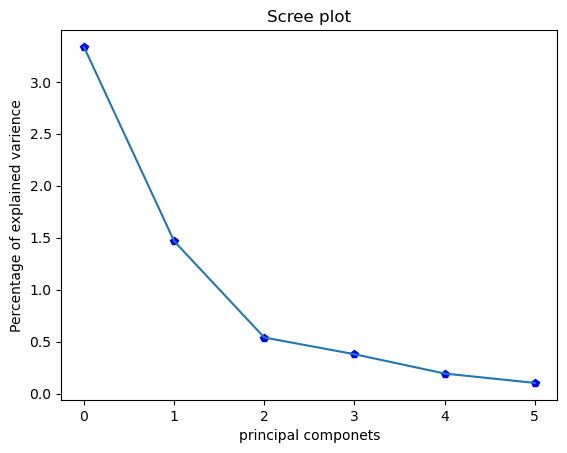

In [28]:
plt.plot(eig_val,"bp")
plt.plot(eig_val)
plt.xlabel("principal componets")
plt.ylabel("Percentage of explained varience")
plt.title("Scree plot")
plt.show()

In [29]:
eigenvector = eig_vec[:,0:5]
eigenvector

array([[ 0.29281736, -0.65279577, -0.18009763, -0.67351145,  0.03192868],
       [-0.41259762, -0.1826526 ,  0.18325321, -0.10688742, -0.77127843],
       [ 0.5016632 , -0.22186047,  0.77871416,  0.22551823, -0.13904419],
       [ 0.48648819, -0.1958641 , -0.55513703,  0.52650468, -0.34418976],
       [-0.40258522, -0.37717286, -0.09600597,  0.24632039, -0.15061662],
       [-0.30595687, -0.55736122,  0.10096085,  0.38238464,  0.49358373]])

In [30]:
df_pca= pd.DataFrame(df_num_std.dot(eigenvector),columns=["PC1","PC2","PC3","PC4","PC5"])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.515703,0.915885,-0.475688,-0.140872,-0.221692
1,-1.623525,-0.021323,-0.290849,0.617006,0.765986
2,-1.034213,0.682953,0.642051,-0.311654,0.439965
3,0.057930,0.054274,0.013815,-0.035444,0.021673
4,-1.751229,0.692597,0.562498,0.349440,-0.263057
